In [27]:
%run init.ipynb

# Simulating non-selective von Neuman measurements

## Quantum channel-based algorithm
Let's consider and observable $O$. If, for a system prepared in the state $\rho$, we measure $O$ non-selectively, or in a non-revealing form, the post-measurement state is
$$\Phi_{O}(\rho)=\sum_{j}|o_{j}\rangle\langle o_{j}|\rho|o_{j}\rangle\langle o_{j}|,$$
which is quivalent to the quantum operations described above if we set the Kraus' operator to $$E_{j}=|o_{j}\rangle\langle o_{j}|.$$ 
It's worth observing that these Kraus' operators must satisfy the restrictions $E_{j}E_{k}=E_{j}\delta_{j,k}\ \forall j,k$ and $\sum_{j=0}^{d_{S}}E_{j}=\mathbb{I}_{S}.$

### One qubit systems
In what follows, let's consider the measurent of a general observable $\hat{n}\cdot\vec{\sigma}$ of a qubit. The eigenvectors are
\begin{align}
& |o_{0}\rangle = |n_{+}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& |o_{1}\rangle = |n_{-}\rangle = \sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle.
\end{align}
The associated projectors are
\begin{align}
E_{0} &= |o_{0}\rangle\langle o_{0}| = \big(\cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle\big)\big(\cos(\theta/2)\langle 0| + e^{-i\phi}\sin(\theta/2)\langle 1|\big) \\
& = \cos^{2}(\theta/2)|0\rangle\langle 0| + e^{-i\phi}\sin(\theta/2)\cos(\theta/2)|0\rangle\langle 1| + e^{i\phi}\sin(\theta/2)\cos(\theta/2)|1\rangle\langle 0| + \sin^{2}(\theta/2)|1\rangle\langle 1| \\
& \doteq \begin{bmatrix} \cos^{2}(\theta/2) & e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ e^{i\phi}\sin(\theta/2)\cos(\theta/2) & \sin^{2}(\theta/2) \end{bmatrix}, \\
E_{1} &= |o_{1}\rangle\langle o_{1}| = \big(\sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle\big)\big(\sin(\theta/2)\langle 0| - e^{-i\phi}\cos(\theta/2)\langle 1|\big) \\
& = \sin^{2}(\theta/2)|0\rangle\langle 0| - e^{-i\phi}\sin(\theta/2)\cos(\theta/2)|0\rangle\langle 1| - e^{i\phi}\sin(\theta/2)\cos(\theta/2)|1\rangle\langle 0| + \cos^{2}(\theta/2)|1\rangle\langle 1| \\
& \doteq \begin{bmatrix} \sin^{2}(\theta/2) & -e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ -e^{i\phi}\sin(\theta/2)\cos(\theta/2) & \cos^{2}(\theta/2) \end{bmatrix}.
\end{align}

In [ ]:
th, ph = symbols('theta phi', real=True) 
E0 = Matrix([[cos(th/2)**2, (cos(ph)-1j*sin(ph))*sin(th/2)*cos(th/2)], 
             [(cos(ph)+1j*sin(ph))*sin(th/2)*cos(th/2),sin(th/2)**2]])
E0

In [ ]:
# coefficients for E0
c0 = trace((id(2)/sqrt(2))*E0); c1 = trace((pauli(1)/sqrt(2))*E0)
c2 = trace((pauli(2)/sqrt(2))*E0); c3 = trace((pauli(3)/sqrt(2))*E0)
simplify(c0), factor(c1), factor(c2), simplify(c3)

So
\begin{align}
E_{0} & = \frac{1}{2}\sigma_{0} + \frac{\sin\theta\cos\phi}{2}\sigma_{1} + \frac{\sin\theta\sin\phi}{2}\sigma_{2} +  \frac{\cos\theta}{2}\sigma_{1} \\
& = W_{0,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{0,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{0,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{0,3}^{A}V_{3,0}^{A}\sigma_{3}.
\end{align}

In [ ]:
E1 = Matrix([[sin(th/2)**2, -(cos(ph)-1j*sin(ph))*sin(th/2)*cos(th/2)], 
             [-(cos(ph)+1j*sin(ph))*sin(th/2)*cos(th/2),cos(th/2)**2]])
E1

In [ ]:
# coefficients for E1
c0 = trace((id(2)/sqrt(2))*E1); c1 = trace((pauli(1)/sqrt(2))*E1)
c2 = trace((pauli(2)/sqrt(2))*E1); c3 = trace((pauli(3)/sqrt(2))*E1)
simplify(c0), factor(c1), factor(c2), simplify(c3)

So
\begin{align}
E_{1} &= \frac{1}{2}\sigma_{0} - \frac{\sin\theta\cos\phi}{2}\sigma_{1} - \frac{\sin\theta\sin\phi}{2}\sigma_{2} -  \frac{\cos\theta}{2}\sigma_{1} \\
& = W_{1,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{1,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{1,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{1,3}^{A}V_{3,0}^{A}\sigma_{3}
\end{align}

In [ ]:
# tests for the properties of the Kraus' operators
simplify(E0*E0), simplify(E1*E1), simplify(E0*E1), simplify(E1*E0), simplify(E0+E1) # ok!

Solving the system of nonlinear equations with Sympy
\begin{equation}
\begin{cases}
|V_{0,0}^{A}|^{2}+|V_{1,0}^{A}|^{2}+|V_{2,0}^{A}|^{2}+|V_{3,0}^{A}|^{2}=1, \\
|W_{0,0}^{A}|^{2}+|W_{0,1}^{A}|^{2}+|W_{0,2}^{A}|^{2}+|W_{0,3}^{A}|^{2}=1, \\
|W_{1,0}^{A}|^{2}+|W_{1,1}^{A}|^{2}+|W_{1,2}^{A}|^{2}+|W_{1,3}^{A}|^{2}=1, \\
(W_{1,0}^{A})^{*}W_{0,0}^{A}+(W_{1,1}^{A})^{*}W_{0,1}^{A}+(W_{1,2}^{A})^{*}W_{0,2}^{A}+(W_{1,3}^{A})^{*}W_{0,3}^{A}=0, \\
W_{0,0}^{A}V_{0,0}^{A} =\frac{1}{2}, \ W_{0,1}^{A}V_{1,0}^{A} = \frac{\sin\theta\cos\phi}{2}, \ W_{0,2}^{A}V_{2,0}^{A} = \frac{\sin\theta\sin\phi}{2}, \ W_{0,3}^{A}V_{3,0}^{A} = \frac{\cos\theta}{2}, \\
W_{1,0}^{A}V_{0,0}^{A} = \frac{1}{2}, \ W_{1,1}^{A}V_{1,0}^{A} = -\frac{\sin\theta\cos\phi}{2}, \ W_{1,2}^{A}V_{2,0}^{A} = -\frac{\sin\theta\sin\phi}{2}, \ W_{1,3}^{A}V_{3,0}^{A} = -\frac{\cos\theta}{2}.
\end{cases}
\end{equation}

In [ ]:
#V00 = 1/sqrt(2); W00 = 1/sqrt(2); W10 = 1/sqrt(2) 
#nonlinsolve([V00**2+V10**2+V20**2+V30**2-1, W00**2+W01**2+W02**2+W03**2-1, 
#             W10**2+W11**2+W12**2+W13**2-1, W10*W00+W11*W01+W12*W02+W13*W03,
#             W00*V00-1/2, W01*V10-sin(th)*cos(ph)/2, W02*V20-sin(th)*sin(ph)/2, W03*V30-cos(th)/2, 
#             W10*V00-1/2, W11*V10+sin(th)*cos(ph)/2, W12*V20+sin(th)*sin(ph)/2, W13*V30+cos(th)/2],
#            [V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13])

## Controll-NOT-based algorithm qubits
Let's consider two qubits prepared in the state $|\Psi_{0}\rangle=|\psi\rangle\otimes|0\rangle$ and apply a $CNOT=|0\rangle\langle 0|\otimes\sigma_{0}+|1\rangle\langle 1|\otimes\sigma_{1}$:
\begin{align}
|\Psi\rangle &= CNOT|\Psi_{0}\rangle = |0\rangle\langle 0||\psi\rangle\otimes\sigma_{0}|0\rangle + |1\rangle\langle 1||\psi\rangle\otimes\sigma_{1}|0\rangle \\
& = \langle 0|\psi\rangle|0\rangle\otimes|0\rangle + \langle 1|\psi\rangle|1\rangle\otimes|1\rangle.
\end{align}
Tracing out the 2nd system:
\begin{align}
Tr_{p}(\Psi) &= |\langle 0|\psi\rangle|^{2}|0\rangle\langle 0| + |\langle 1|\psi\rangle|^{2}|1\rangle\langle 1| \\
&  = \langle 0|\psi\rangle\langle\psi|0\rangle|0\rangle\langle 0| + \langle 1|\psi\rangle\langle\psi|1\rangle|1\rangle\langle 1|  = |0\rangle\langle 0|\psi\rangle\langle\psi|0\rangle\langle 0| + |1\rangle\langle 1|\psi\rangle\langle\psi|1\rangle\langle 1| \\
&= P_{0}|\psi\rangle\langle\psi|P_{0} + P_{1}|\psi\rangle\langle\psi|P_{1} =: \Pi_{0,1}(\psi).
\end{align}
So, the control-NOT can be used to perform a non-selective measurement in the computational basis.

Following, let's consider a general basis
\begin{align}
|n_{0}\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle = U|0\rangle, \\
|n_{1}\rangle = -\sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle = U|1\rangle,
\end{align}
with
\begin{equation}
U_{c\rightarrow g} = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i\phi}\cos(\theta/2) \end{bmatrix} \ \therefore\  U_{c\rightarrow g}^{\dagger} = \begin{bmatrix} \cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -\sin(\theta/2) & e^{-i\phi}\cos(\theta/2) \end{bmatrix}.
\end{equation}

Non-selective measure of the general observable $\hat{n}\cdot\vec{\sigma}$:
\begin{align}
\Pi_{n_{0},n_{1}}(\psi) &= P_{n_{0}}|\psi\rangle\langle\psi|P_{n_{0}}  + P_{n_{1}}|\psi\rangle\langle\psi|P_{n_{1}} \\ 
&= |n_{0}\rangle\langle n_{0}||\psi\rangle\langle\psi||n_{0}\rangle\langle n_{0}|  + |n_{1}\rangle\langle n_{1}||\psi\rangle\langle\psi||n_{1}\rangle\langle n_{1}| \\
&= U|0\rangle\langle 0|U^{\dagger}|\psi\rangle\langle\psi|U|0\rangle\langle 0|U^{\dagger}  + U|1\rangle\langle 1|U^{\dagger}|\psi\rangle\langle\psi|U|1\rangle\langle 1|U^{\dagger} \\
&= U\big(|0\rangle\langle 0||\psi'\rangle\langle\psi'||0\rangle\langle 0|  + |1\rangle\langle 1||\psi'\rangle\langle\psi'||1\rangle\langle 1|\big)U^{\dagger} \\
&= U\Pi_{0,1}(\psi')U^{\dagger},
\end{align}
where we defined $$|\psi'\rangle:=U^{\dagger}|\psi\rangle.$$ So, a non-selective measurement of an arbitrary one-qubit observable may be implemented using the quantum circuit below
<img src='fig_measure_sim.png' width='400'>

IBMQE gates: $U(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}$. We shall also need $U^{\dagger}(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\theta/2) & e^{-i\phi}\sin(\theta/2) \\ -e^{-i\lambda}\sin(\theta/2) & e^{-i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix} = U(\theta,\pi-\lambda,-\pi-\phi)$

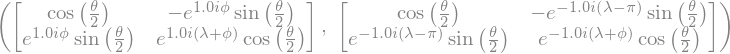

In [3]:
def U(th,ph,lb):
    return Matrix([[cos(th/2),-exp(1j*ph)*sin(th/2)],
                   [exp(1j*ph)*sin(th/2),exp(1j*(ph+lb))*cos(th/2)]])
th,ph,lb = symbols('theta phi lambda', real=True)
U(th,ph,lb), simplify(U(th,pi-lb,-pi-ph)) # ok!

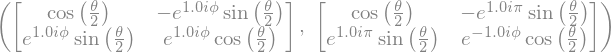

In [4]:
U(th,ph,0), U(th,pi-0,-pi-ph) # ok!

# Implementation on IBMQ
## Representation of a qubit state $\rho$ in a basis $\{|n_{0}\rangle,|n_{1}\rangle\}$

In [28]:
def n_basis(th, ph, typ): # general one-qubit basis
    if typ == 's': # for symbols
        ket_n0 = Matrix([[cos(th/2)],[(cos(ph)+1j*sin(ph))*sin(th/2)]])
        bra_n0 = Matrix([[cos(th/2),(cos(ph)-1j*sin(ph))*sin(th/2)]])
        ket_n1 = Matrix([[-sin(th/2)],[(cos(ph)+1j*sin(ph))*cos(th/2)]])
        bra_n1 = Matrix([[-sin(th/2),(cos(ph)-1j*sin(ph))*cos(th/2)]])
    elif typ == 'n': # for numbers
        ket_n0 = np.array([[math.cos(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2)]])
        bra_n0 = np.array([[math.cos(th/2),(math.cos(ph)-1j*math.sin(ph))*math.sin(th/2)]])
        ket_n1 = np.array([[-math.sin(th/2)],[(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2)]])
        bra_n1 = np.array([[-math.sin(th/2),(math.cos(ph)-1j*math.sin(ph))*math.cos(th/2)]])
    return ket_n0, bra_n0, ket_n1, bra_n1

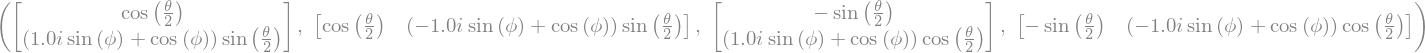

In [21]:
typ = 's' # choose to use symbols (s) or numbers (any other symbol)
if typ == 's':
    th, ph = symbols('theta phi'); ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
elif typ == 'n':
    th = math.pi/4; ph = 0; ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
ket_n0, bra_n0, ket_n1, bra_n1

In [29]:
def rho_basis_n(th, ph, rho, typ): # representation of rho in a given basis
    ket_n0, bra_n0, ket_n1, bra_n1 = n_basis(th, ph, typ)
    if typ == 's':
        rhon = Matrix([[bra_n0*rho*ket_n0, bra_n0*rho*ket_n1],[bra_n1*rho*ket_n0, bra_n1*rho*ket_n1]])
    elif typ == 'n':
        rho00 = bra_n0.dot(rho.dot(ket_n0)); rho01 = bra_n0.dot(rho.dot(ket_n1))
        rho10 = bra_n1.dot(rho.dot(ket_n0)); rho11 = bra_n1.dot(rho.dot(ket_n1))
        rhon = np.array([[rho00.item(), rho01.item()],[rho10.item(), rho11.item()]])
    return rhon

In [23]:
typ = 'n'
if typ == 's':
    th, ph = symbols('theta phi'); rho00,rho01,rho10,rho11 = symbols('r_{00} r_{01} r_{10} r_{11}') 
    rho = Matrix([[rho00,rho01],[rho10,rho11]]); rhon = rho_basis_n(th, ph, rho, typ)
elif typ == 'n':
    th = -math.pi/2; ph = 0; rho00,rho01,rho10,rho11 = 1,0,0,0
    rho = np.array([[rho00,rho01],[rho10,rho11]]); rhon = rho_basis_n(th, ph, rho, typ)
rhon

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

## Functions
von Neumann predictability in relation to the observable $X$: 
$$P_{vn}^{X}(\rho) = \log_{2}(d)-S_{vn}(\Phi_{X}(\rho)).$$ 
We have the equality 
$$P_{vn}^{X}(\rho) = C_{re}^{Y}(\Phi_{X}(\rho)),$$ 
where
$$C_{re}^{Y}(\Phi_{X}(\rho)) = S_{vn}(\Phi_{X}(\rho)_{diag})-S_{vn}(\Phi_{X}(\rho)).$$

In [44]:
%run entropy.ipynb

### Predictability

In [45]:
def predictability_vn(rho, th, ph): # th,ph define the reference basis
    d = rho.shape[0]; 
    # matrix rep. of rho in the basis def. by (th,ph)
    rhon = rho_basis_n(th, ph, rho, 'n');# print('rhon = ',rhon)
    pv = np.zeros(d); 
    for j in range(0,d):
        pv[j] = rhon[j,j].real
    return log(d, 2) - shannon_num(pv)

In [46]:
rho = np.array([[1/2,0],[0,1/2]]); predictability_vn(rho, 0, 0)

### Coherence

In [47]:
def coherence_re(rho, th, ph): # th,ph defines the reference basis
    d = rho.shape[0]; pv = np.zeros(d)
    # to deal with numerical issues in computing eigenvalues of rho for Svn
    for j in range(0, d):
        if abs(1 - rho[j,j].real) < 10**-15:
            rho[j,j] = 1-10**-15
            if j < d-1:
                rho[j+1,j+1] = 1+10**-15
        elif abs(rho[j,j].real) < 10**-15:
            rho[j,j] = 10**-15
    # matrix rep. of rho in the basis def. by (th,ph)
    rhon = rho_basis_n(th, ph, rho, 'n'); #print(rhon)
    # to deal with numerical issues in computing eigenvalues of rho for Svn
    for j in range(0, d):
        if abs(1 - rhon[j,j].real) < 10**-15:
            rhon[j,j] = 1-10**-15
            if j < d-1:
                rhon[j+1,j+1] = 1+10**-15
        elif abs(rhon[j,j].real) < 10**-15:
            rhon[j,j] = 10**-15
    for j in range(0,d):
        pv[j] = rhon[j,j].real
    # we use the same state to compute S_vn because of its basis invariance
    #print(shannon_num(pv),von_neumann_num(rho))
    return shannon_num(pv) - von_neumann_num(rho)

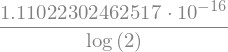

In [48]:
rho = np.array([[0.99999999999999999,0],[0,1-0.99999999999999999]]); coherence_re(rho, 0, 0)

### Purity

In [29]:
def purity(rho):
    return np.trace(rho.dot(rho))

In [30]:
rho = np.array([[0.99999,0],[0,0.00001]]); print('rho = ',rho); # ok for some examples
print('P = ', purity(rho))
th = -0*math.pi/2; ph = 0
print('P_vn = ', float(predictability_vn(rho, th, ph)))
th = -1*math.pi/2; ph = 0
print('C_re = ', float(coherence_re(rho, th, ph)))

rho =  [[9.9999e-01 0.0000e+00]
 [0.0000e+00 1.0000e-05]]
P =  0.9999800002000001
P_vn =  0.9998194767169818
C_re =  0.9998194767169818


## Implementation

In [32]:
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In [33]:
nshots = 8192
qr = QuantumRegister(2); 
qc = qiskit.QuantumCircuit(qr); 

In [34]:
# Verification that the circuit is right
import math
# State preparation
th1, ph1, lb1 = math.pi, math.pi, 0; 
qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
qc.draw()

┌──────────┐
q0_0: ┤ U(π,π,0) ├
      └──────────┘
q0_1: ────────────

In [61]:
qc.barrier()
# Non-revealing measurement
th2 = math.pi; ph2 = math.pi/2; lb2 = 0
th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; qc.u(th3, ph3, lb3, qr[0]); # Uˆdagger
qc.cx(qr[0], qr[1]); #print('meas = ',th2, ph2, lb2)
qc.u(th2, ph2, lb2, qr[0]);
# qstate tomography for Pi(rho)
qst_qc = state_tomography_circuits(qc, [qr[0],qr[1]]) # defines the qcircuit to make qst
job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=shots) # executes the qst
qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
rho10_meas = qstf_qc.fit(method='lstsq'); 
rho0_meas = pTraceL_num(2, 2, rho10_meas); #print('Pi(rho) = ', rho0_meas)
qc.draw()

┌──────────┐┌──────────────┐     ┌────────────┐
q4_0: ┤ U(π,π,0) ├┤ U(π,π,-3π/2) ├──■──┤ U(π,π/2,0) ├
      └──────────┘└──────────────┘┌─┴─┐└────────────┘
q4_1: ────────────────────────────┤ X ├──────────────
                                  └───┘

### IBMQ-related stuff

In [74]:
from qiskit import IBMQ

In [75]:
#IBMQ.save_account('', overwrite = True)

In [76]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-08 18:35:54,265: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [79]:
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
#provider.backends()

In [80]:
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
nshots = 8192

### 1st app:

$$|\psi\rangle = \cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle \text{ for } \theta\in[0,\pi/2]$$

In [81]:
import platform
if platform.system() == 'Linux':
    path = '/home/jonasmaziero/Dropbox/Research/predictability/data_psi/round1/'
else:
    path = '/Users/jonasmaziero/Dropbox/Research/predictability/data_psi/round1/'
print(path) # ok!

/Users/jonasmaziero/Dropbox/Research/predictability/data_psi/round1/


In [82]:
# Measurement error mitigation of the chosen device
qr = QuantumRegister(2)
qc_cal = qiskit.QuantumCircuit(qr)
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = qc.qregs[0], circlabel = 'mmc')
cal_job = execute(cal_circuits, backend = device, shots = nshots, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter
# using
#mitigated_result = meas_filter.apply(job.result());

60e76fd1b58808dc276cbd54
Job Status: job has successfully run


In [72]:
%run ptr.ipynb

In [73]:
th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
for j in range(0, N+1):
    qr = QuantumRegister(2)
    qc = qiskit.QuantumCircuit(qr)
    th += dth
    thv[j] = th 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the state preparation
    qc.u(th1, ph1, lb1, qr[0]); #print('prep = ',th1, ph1, lb1)
    # qstate tomography for rho
    qst_qc1 = state_tomography_circuits(qc, [qr[0],qr[1]]); # defines the qcircuit to make qst
    # simulator
    job_sim1 = qiskit.execute(qst_qc1, backend = simulator, shots = nshots); # executes the qst
    qstf_qc_sim1 = StateTomographyFitter(job_sim1.result(), qst_qc1); # fits the data to extract rho
    rho10_prep_sim = qstf_qc_sim1.fit(method = 'lstsq');
    rho0_prep_sim = pTraceL_num(2, 2, rho10_prep_sim)
    file = open(path+str(j)+'prep'+'sim', "wb"); np.save(file, rho0_prep_sim); file.close;
    # device
    job_dev1 = qiskit.execute(qst_qc1, backend = device, shots = nshots); # executes the qst
    print(job_dev1.job_id());
    job_monitor(job_dev1);
    job_dev_mit1 = meas_filter.apply(job_dev1.result(), method='least_squares'); # error mitigation
    qstf_qc_dev1 = StateTomographyFitter(job_dev_mit1, qst_qc1); # fits the data to extract rho
    rho10_prepE = qstf_qc_dev1.fit(method = 'lstsq');
    rho0_prepE = pTraceL_num(2, 2, rho10_prepE)
    file = open(path+str(j)+'prep'+'dev', "wb"); np.save(file, rho0_prepE); file.close;
    '''
    # Non-revealing measurement
    th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; # angles for Uˆdagger
    qc.u(th3, ph3, lb3, qr[0]); # Uˆdagger
    qc.cx(qr[0], qr[1]) # CNOT
    qc.u(th2, ph2, lb2, qr[0]); # Final U
    # qstate tomography for Pi(rho)
    qst_qc2 = state_tomography_circuits(qc, [qr[0]]); # defines the qcircuit to make qst
    # simulator
    job_sim2 = qiskit.execute(qst_qc2, backend = simulator, shots = nshots); # executes the qst
    qstf_qc_sim2 = StateTomographyFitter(job_sim2.result(), qst_qc2); # fits the data to extract rho
    rho0_meas = qstf_qc_sim2.fit(method='lstsq');
    file = open(path+str(j)+'meas'+'sim', "wb"); np.save(file, rho0_meas); file.close;
    # device
    job_dev2 = qiskit.execute(qst_qc2, backend = device, shots = nshots); # executes the qst
    print(job_dev2.job_id());
    job_monitor(job_dev2);
    job_dev_mit2 = meas_filter.apply(job_dev2.result(), method='least_squares'); # error mitigation
    qstf_qc_dev2 = StateTomographyFitter(job_dev_mit2.result(), qst_qc2); # fits the data to extract rho
    rho0_measE = qstf_qc_dev2.fit(method='lstsq');
    file = open(path+str(j)+'meas'+'dev', "wb"); np.save(file, rho0_measE); file.close;
    '''

IBMQBackendApiError: 'Error submitting job: "HTTPSConnectionPool(host=\'api-qcon.quantum-computing.ibm.com\', port=443): Read timed out. (read timeout=None)"'

In [44]:
Pv = np.zeros(N+1); Cv = np.zeros(N+1); Sv = np.zeros(N+1)
PvE = np.zeros(N+1); CvE = np.zeros(N+1); SvE = np.zeros(N+1)
for j in range(0, N+1):
    file = open(path+str(j)+'prep'+'sim', "rb"); rho0_prep = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    Pv[j] = predictability_vn(rho0_prep, th2, ph2)
    Sv[j] = linear_entropy(rho0_prep)
    file = open(path+str(j)+'prep'+'dev', "rb"); rho0_prepE = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    PvE[j] = predictability_vn(rho0_prepE, th2, ph2)
    SvE[j] = linear_entropy(rho0_prepE)
    file = open(path+str(j)+'meas'+'sim', "rb"); rho0_meas = np.load(file)
    Cv[j] = coherence_re(rho0_meas, -math.pi/2, 0) # C with reference to sigma_x
    file = open(path+str(j)+'meas'+'dev', "rb"); rho0_measE = np.load(file)
    CvE[j] = coherence_re(rho0_measE, -math.pi/2, 0) # C with reference to sigma_x
    print('th = ', thv[j], ', P = ', Pv[j], ', C = ', Cv[j], ', S = ', Sv[j],
          ', PE = ', PvE[j], ', CE = ', CvE[j], ', SE = ', SvE[j])

th =  0.1 , P =  0.9752953993927822 , C =  0.9784408880152994 , S =  3.072619438193591e-05 , PE =  0.9021718949493143 , CE =  0.8913686845033462 , SE =  -2.220446049250313e-16
th =  0.25707963267948963 , P =  0.8829837997294774 , C =  0.8746663758118112 , S =  2.220446049250313e-16 , PE =  0.830440814555092 , CE =  0.8116626764474815 , SE =  0.0
th =  0.4141592653589793 , P =  0.7497376383505936 , C =  0.7559840866692327 , S =  -2.220446049250313e-16 , PE =  0.7057631035509262 , CE =  0.702765150865797 , SE =  0.0
th =  0.571238898038469 , P =  0.5894290353630852 , C =  0.6071995751862327 , S =  0.012796342372893843 , PE =  0.5610797256138276 , CE =  0.5820181910233337 , SE =  0.0
th =  0.7283185307179586 , P =  0.45030809694740204 , C =  0.45177003636587254 , S =  0.0 , PE =  0.4520417867526365 , CE =  0.44793352261692715 , SE =  2.220446049250313e-16
th =  0.8853981633974483 , P =  0.3043044961271205 , C =  0.31749544057555007 , S =  0.006593048572540061 , PE =  0.30356417780619327 ,

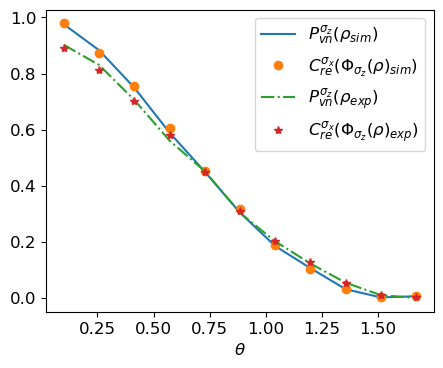

In [48]:
import matplotlib
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(thv, Pv, label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{sim})$') 
#plt.plot(thv, Sv, label = r'$S_{L}(\rho_{sim})$')
plt.plot(thv, PvE, '-.', label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.plot(thv, CvE, '*', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{exp})$') 
#plt.plot(thv, SvE, 'D', label = r'$S_{L}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
#plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
plt.legend(loc = 'upper right')
plt.savefig(path+'psi_plot1.png', format = 'png', dpi = 200)
plt.show()

### 2nd app: 
$$|\psi\rangle = \cos(\theta/2)|00\rangle+\sin(\theta/2)|11\rangle$ for $\theta\in[0,\pi/2]$$

Nesse caso, o estado reduzido é $$\rho =  \cos^{2}(\theta/2)|0\rangle\langle 0| + \sin^{2}(\theta/2)|1\rangle\langle 1|$$

In [78]:
import platform
if platform.system() == 'Linux':
    path = '/home/jonasmaziero/Dropbox/Research/predictability/data_rho/round1/'
else:
    path = '/Users/jonasmaziero/Dropbox/Research/predictability/data_rho/round1/'
print(path) # ok!

In [79]:
shots = 8192
th_min = 0; th_max = math.pi/2; N = 10; dth = (th_max-th_min)/N; th = -dth + 10**-1; thv = np.zeros(N+1)
for j in range(0, N+1):
    qr = QuantumRegister(3); qc = qiskit.QuantumCircuit(qr)
    th += dth; thv[j] = th; #print(thv[j]); 
    
    # State preparation
    th1 = th; ph1 = 0; lb1 = 0 # angles for the two-qubit state preparation
    qc.u(th1, ph1, lb1, qr[0])
    qc.cx(qr[0], qr[1])
    # qstate tomography for rho
    qst_qc = state_tomography_circuits(qc, [qr[1]]) # defines the qcircuit to make qst
    # simulator
    job = qiskit.execute(qst_qc, backend = simulator, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_prep = qstf_qc.fit(method = 'lstsq')
    file = open(path+str(j)+'prep'+'sim', "wb"); np.save(file, rho0_prep); file.close
    # device
    job = qiskit.execute(qst_qc, backend = device, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_prepE = qstf_qc.fit(method = 'lstsq')
    file = open(path+str(j)+'prep'+'dev', "wb"); np.save(file, rho0_prepE); file.close
    
    # Non-revealing measurement
    th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; # angles for U^dagger
    qc.u(th3, ph3, lb3, qr[1]); # Uˆdagger
    qc.cx(qr[1], qr[2]); # CNOT
    qc.u(th2, ph2, lb2, qr[1]); # the last U
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[1]]) # defines the qcircuit to make qst
    # simulator
    job = qiskit.execute(qst_qc, backend = simulator, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_meas = qstf_qc.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'sim', "wb"); np.save(file, rho0_meas); file.close
    # device
    job = qiskit.execute(qst_qc, backend = device, shots = nshots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho0_measE = qstf_qc.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'dev', "wb"); np.save(file, rho0_measE); file.close

In [80]:
job_monitor(job)

Job Status: job has successfully run


In [82]:
Pv = np.zeros(N+1); Cv = np.zeros(N+1); Sv = np.zeros(N+1)
PvE = np.zeros(N+1); CvE = np.zeros(N+1); SvE = np.zeros(N+1)
for j in range(0, N+1):
    file = open(path+str(j)+'prep'+'sim', "rb"); rho0_prep = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    Pv[j] = predictability_vn(rho0_prep, th2, ph2)
    Sv[j] = linear_entropy(rho0_prep)
    file = open(path+str(j)+'prep'+'dev', "rb"); rho0_prepE = np.load(file)
    th2, ph2, lb2 = 0, 0, 0 # P in relation to sigma_z, & we measure in this basis
    PvE[j] = predictability_vn(rho0_prepE, th2, ph2)
    SvE[j] = linear_entropy(rho0_prepE)
    file = open(path+str(j)+'meas'+'sim', "rb"); rho0_meas = np.load(file)
    Cv[j] = coherence_re(rho0_meas, -math.pi/2, 0) # C with reference to sigma_x
    file = open(path+str(j)+'meas'+'dev', "rb"); rho0_measE = np.load(file)
    CvE[j] = coherence_re(rho0_measE, -math.pi/2, 0) # C with reference to sigma_x
    print('th = ', thv[j], ', P = ', Pv[j], ', C = ', Cv[j], ', S = ', Sv[j],
          ', PE = ', PvE[j], ', CE = ', CvE[j], ', SE = ', SvE[j])

th =  0.1 , P =  0.9763587926611335 , C =  0.9651140581686878 , S =  0.004533112049102561 , PE =  0.7514076254138233 , CE =  0.5797833959219881 , SE =  0.07449975609779402
th =  0.25707963267948963 , P =  0.8868148164620783 , C =  0.8797941344841596 , S =  0.02977296710014321 , PE =  0.6885192690938824 , CE =  0.5425106052880965 , SE =  0.10252657532691867
th =  0.4141592653589793 , P =  0.7642835945489004 , C =  0.7444061788481758 , S =  0.0740714073181159 , PE =  0.5839349086365273 , CE =  0.4817028472280118 , SE =  0.14860293269157387
th =  0.571238898038469 , P =  0.5945431698787081 , C =  0.6076804323124576 , S =  0.148688465356827 , PE =  0.4745253775289242 , CE =  0.3902125162517966 , SE =  0.20472806692123435
th =  0.7283185307179586 , P =  0.4475914534573774 , C =  0.45613573929711426 , S =  0.22341474890708946 , PE =  0.37741714060514486 , CE =  0.3036224359677458 , SE =  0.2567662298679352
th =  0.8853981633974483 , P =  0.3102879477694489 , C =  0.306713594724637 , S =  0.3

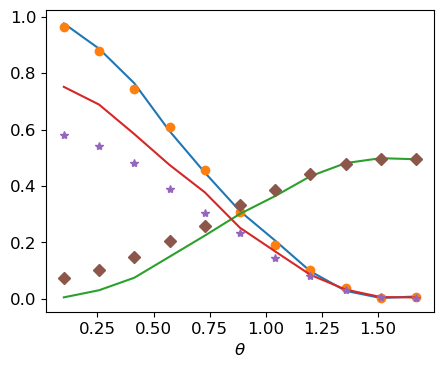

In [88]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(thv, Pv, label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.plot(thv, Cv, 'o', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{sim})$') 
plt.plot(thv, Sv, label = r'$S_{L}(\rho_{sim})$')
plt.plot(thv, PvE, label = r'$P_{vn}^{\sigma_{z}}(\rho_{exp})$')
plt.plot(thv, CvE, '*', label = r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{exp})$') 
plt.plot(thv, SvE, 'D', label = r'$S_{L}(\rho_{exp})$')
plt.xlabel(r'$\theta$'); 
#plt.legend(loc = 'center right', bbox_to_anchor=(th_max-0.05, 0.5))
#plt.legend(loc = 'upper right')
plt.savefig(path+'rho1.eps', format = 'eps', dpi = 200)
plt.show()

### 3rd app: 
Random states

In [96]:
from qiskit.circuit.random import random_circuit
#nq = 2 # number of qubits
#de = 3 # depth = layers of operations 
#circ = random_circuit(nq, de, measure=False)
#circ.draw(output = 'mpl')

In [98]:
shots = 8192; N = 100; Pv = np.zeros(N+1); Cv = np.zeros(N+1)
for j in range(0, N+1):
    qr = QuantumRegister(3)
    qc = qiskit.QuantumCircuit(qr)
    
    # State preparation
    rcirc = random_circuit(2, 2, measure=False)
    qc.append(rcirc, [qr[0], qr[1]])
    # qstate tomography for rho
    qst_qc = state_tomography_circuits(qc, [qr[1]]) # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=shots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho1_prep = qstf_qc.fit(method = 'lstsq')#; print('rho = ', rho1_prep)
    th2, ph2 = 0, 0 # P with reference to sigma_z
    Pv[j] = predictability_vn(rho1_prep, th2, ph2)
    
    # Non-revealing measurement
    th3 = th2; ph3 = math.pi-lb2; lb3 = -math.pi-ph2; # angles for U^dagger
    qc.u(th3, ph3, lb3, qr[1]); # Uˆdagger
    qc.cx(qr[1], qr[2]); # CNOT
    qc.u(th2, ph2, lb2, qr[1]); # the last U
    # qstate tomography for Pi(rho)
    qst_qc = state_tomography_circuits(qc, [qr[1]]) # defines the qcircuit to make qst
    job = qiskit.execute(qst_qc, Aer.get_backend('qasm_simulator'), shots=shots) # executes the qst
    qstf_qc = StateTomographyFitter(job.result(), qst_qc) # fits the data to extract rho
    rho1_meas = qstf_qc.fit(method='lstsq'); #print('Phi(rho) = ', rho1_meas)
    thc, phc = -math.pi/2, 0; # C with reference to sigma_x
    Cv[j] = coherence_re(rho1_meas, thc, phc) 
    
    print('P = ', Pv[j], ', C = ', Cv[j])

P =  0.1717138844502002 , C =  0.17657930179897097
P =  0.9996508830637357 , C =  0.9999947976565453


TypeError: can't convert complex to float

In [ ]:
matplotlib.rcParams.update({'font.size':13}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(Pv, Cv, '.', label = r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$')
plt.xlabel(r'$P_{vn}^{\sigma_{z}}(\rho_{sim})$');
plt.ylabel(r'$C_{re}^{\sigma_{x}}(\Phi_{\sigma_{z}}(\rho)_{sim})$')
plt.show()

# Two qubits

## Non-selective measurements in the computational basis


# Random observables
Here we experimentally test the inequality $$C^{Y}_{re}(\Phi_{X}(\rho)) \le P^{X}_{vn}(\rho).$$
For doing that, we can fix $\rho$ and choose $X$ randomly or vice versa, or we can choose both $\rho$ and $X$ randomly.

Let's start with $\rho=|0\rangle\langle 0|$ and $Y=\sigma_{z}$

In [25]:
import platform
if platform.system() == 'Linux':
    path = '/home/jonasmaziero/Dropbox/Research/predictability/randX/'
else:
    path = '/Users/jonasmaziero/Dropbox/Research/predictability/randX/'

In [134]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
nshots = 8192
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

ibmqfactory.load_account:WARNING:2021-07-17 00:04:55,687: Credentials are already in use. The existing account in the session will be replaced.


In [136]:
N = 100 # number of samples
dth = math.pi/N; th = 0
thv = np.zeros(N); phv = np.zeros(N); jv = np.zeros(N)
for j in range(0, N):
    jv[j] = j
    qr = QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
    # State preparation
    th = math.acos(-1 + 2*random.random()); ph = 2*math.pi*random.random(); lb = 0
    qc.u(th, ph, lb, qr[0])
    qst_qc1 = state_tomography_circuits(qc, [qr[0]]); # defines the qcircuit to make qst
    # simulator
    job = qiskit.execute(qst_qc1, backend = simulator, shots = nshots) # executes the qst
    qstf_qc1 = StateTomographyFitter(job.result(), qst_qc1) # fits the data to extract rho
    rho0_prep = qstf_qc1.fit(method = 'lstsq'); #print(predictability_vn(rho0_prep, 0, 0)) # ok
    file = open(path+str(j)+'prep'+'sim', "wb"); np.save(file, rho0_prep); file.close
    # device
    job1E = qiskit.execute(qst_qc1, backend = device, shots = nshots) # executes the qst
    print(job1E.job_id()); job_monitor(job1E)
    qstf_qc1E = StateTomographyFitter(job1E.result(), qst_qc1) # fits the data to extract rho
    rho0_prepE = qstf_qc1E.fit(method = 'lstsq')
    file = open(path+str(j)+'prep'+'dev', "wb"); np.save(file, rho0_prepE); file.close
    
    # Non-revealing measurement
    th = math.acos(-1 + 2*random.random()); ph = 2*math.pi*random.random(); lb = 0
    #th += dth; ph = 0; lb = 0
    thv[j] = th; phv[j] = ph; #print(thv[j],phv[j])
    th1 = th; ph1 = math.pi-lb; lb1 = -math.pi-ph; # angles for U^dagger
    qc.u(th1, ph1, lb1, qr[0]); # Uˆdagger
    qc.cx(qr[0], qr[1]); # CNOT
    qc.u(th, ph, lb, qr[0]); # the last U
    qst_qc2 = state_tomography_circuits(qc, [qr[0]]) # defines the qcircuit to make qst
    # simulator
    job2 = qiskit.execute(qst_qc2, backend = simulator, shots = nshots) # executes the qst
    qstf_qc2 = StateTomographyFitter(job2.result(), qst_qc2) # fits the data to extract rho
    rho0_meas = qstf_qc2.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'sim', "wb"); np.save(file, rho0_meas); file.close
    # device
    job2E = qiskit.execute(qst_qc2, backend = device, shots = nshots) # executes the qst
    print(job2E.job_id()); job_monitor(job2E)
    qstf_qc2E = StateTomographyFitter(job2E.result(), qst_qc2) # fits the data to extract rho
    rho0_measE = qstf_qc2E.fit(method='lstsq') 
    file = open(path+str(j)+'meas'+'dev', "wb"); np.save(file, rho0_measE); file.close

60f249d176776b74c9ad5d67
Job Status: job has successfully run
60f249f35a912a9ea2603ba3
Job Status: job has successfully run
60f24a0865c2eb01470ec6d3
Job Status: job has successfully run
60f24a475a912a13e4603ba9
Job Status: job has successfully run
60f24a5cc50bbc2aa0d21d4d
Job Status: job has successfully run
60f24a6f65c2eb6d6b0ec6d9
Job Status: job has successfully run
60f24a8d5a912a51d4603bae
Job Status: job has successfully run
60f24aa98bc549f67ed963c4
Job Status: job has successfully run
60f24aca666099fc8987be88
Job Status: job has successfully run
60f24aed24ebb727931fd2d9
Job Status: job has successfully run
60f24b0165c2eb8bf90ec6e2
Job Status: job has successfully run
60f24b1865c2eb06110ec6e5
Job Status: job has successfully run
60f24b3976776b74f1ad5d81
Job Status: job has successfully run
60f24b4e811f3d7de807d3f2
Job Status: job has successfully run
60f24b645a912a7ba6603bbd
Job Status: job has successfully run
60f24b7a811f3dff0f07d3f5
Job Status: job has successfully run
60f24b90

Job Status: job has successfully run
60f256fd7c3f4eb869325206
Job Status: job has successfully run
60f2572665c2eb28140ec778
Job Status: job has successfully run
60f2575176776b40fbad5e26
Job Status: job has successfully run
60f2577a5a912a9e04603c55
Job Status: job has successfully run
60f257a38bc549c01cd96471
Job Status: job has successfully run
60f257c6c50bbce0bdd21df3
Job Status: job has successfully run
60f257e751939c20a9a364e7
Job Status: job has successfully run
60f2580a51939c7c9fa364e8
Job Status: job has successfully run
60f2583fc50bbc433fd21df8
Job Status: job has successfully run
60f2587b8bc5492ebcd9647a
Job Status: job has successfully run
60f258b576776b0141ad5e36
Job Status: job has successfully run
60f258d665c2ebe46a0ec78c
Job Status: job has successfully run
60f2592d811f3d243207d4a0
Job Status: job has successfully run
60f25996666099cab987bf3b
Job Status: job has successfully run
60f259a9811f3d568407d4a5
Job Status: job has successfully run
60f259c751939c374ea364f6
Job Stat

In [148]:
Pv = np.zeros(N); Cv = np.zeros(N); PvE = np.zeros(N); CvE = np.zeros(N)
for j in range(0, N):
    file = open(path+str(j)+'prep'+'sim', "rb"); rho0_prep = np.load(file)
    Pv[j] = predictability_vn(rho0_prep, thv[j], phv[j]) # P with reference to X
    file = open(path+str(j)+'prep'+'dev', "rb"); rho0_prepE = np.load(file)
    PvE[j] = predictability_vn(rho0_prepE, thv[j], phv[j])
    th = math.acos(-1 + 2*random.random()); ph = 2*math.pi*random.random()
    file = open(path+str(j)+'meas'+'sim', "rb"); rho0_meas = np.load(file)
    Cv[j] = coherence_re(rho0_meas, th, ph) # C with reference to Y
    file = open(path+str(j)+'meas'+'dev', "rb"); rho0_measE = np.load(file)
    CvE[j] = coherence_re(rho0_measE, th, ph)

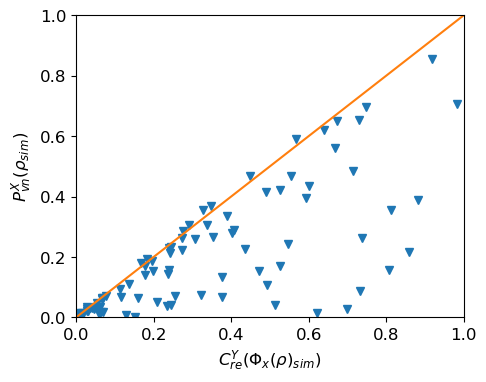

In [167]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(Pv, Cv, 'v'); plt.xlim(0,1); plt.ylim(0,1); 
plt.plot([0,1],[0,1]); plt.xlabel(r'$C^{Y}_{re}(\Phi_{x}(\rho)_{sim})$'); 
plt.ylabel(r'$P^{X}_{vn}(\rho_{sim})$'); plt.show()

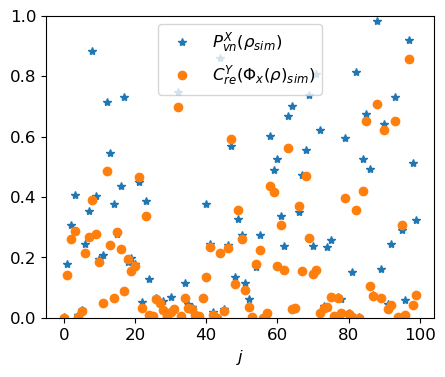

In [169]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(jv, Pv, '*', label = r'$P^{X}_{vn}(\rho_{sim})$'); 
plt.plot(jv, Cv, 'o', label = r'$C^{Y}_{re}(\Phi_{x}(\rho)_{sim})$'); plt.ylim(0, 1)
plt.xlabel(r'$j$'); plt.legend(loc = 'upper center'); plt.show()

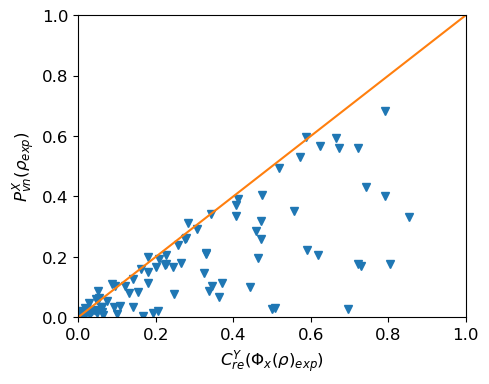

In [170]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(PvE, CvE, 'v'); plt.xlim(0,1); plt.ylim(0,1); 
plt.plot([0,1],[0,1]); plt.xlabel(r'$C^{Y}_{re}(\Phi_{x}(\rho)_{exp})$'); 
plt.ylabel(r'$P^{X}_{vn}(\rho_{exp})$'); plt.show()

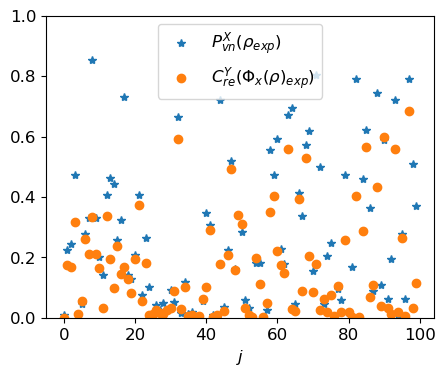

In [171]:
import matplotlib; matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (5,4), dpi = 100)
plt.plot(jv, PvE, '*', label = r'$P^{X}_{vn}(\rho_{exp})$'); 
plt.plot(jv, CvE, 'o', label = r'$C^{Y}_{re}(\Phi_{x}(\rho)_{exp})$'); plt.ylim(0, 1)
plt.xlabel(r'$j$'); plt.legend(loc = 'upper center'); plt.show()

In [ ]:
print()